# Run the whole deltas algorithm

In [39]:
%load_ext autoreload
%autoreload 2

import numpy as np
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [40]:
N1 = 10000
N2 = 100
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


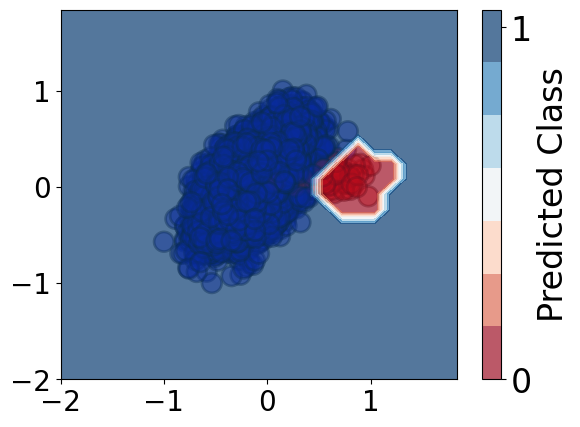

SMOTE


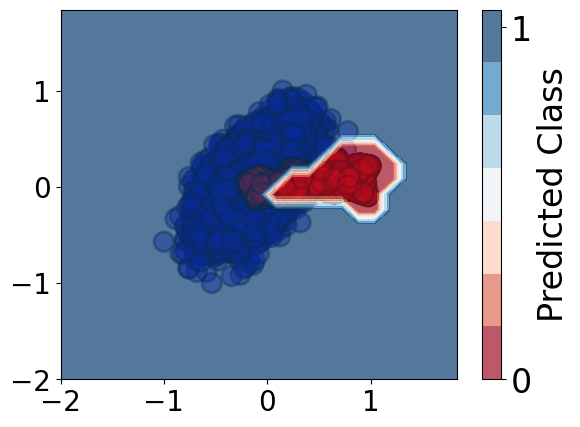

In [41]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


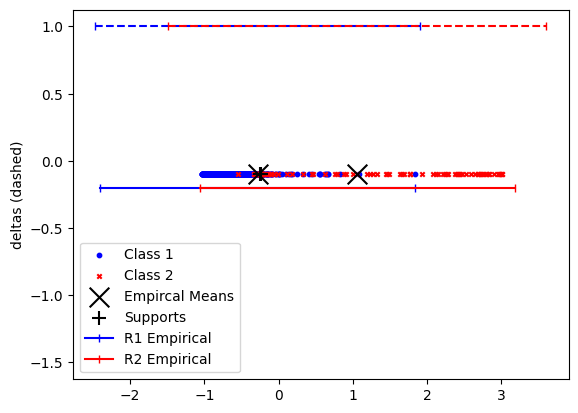

Unable to find result with downsample, increase the budget


In [44]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = model_deltas.downsample_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, cut_off_trials=100)

## Show parameters

In [ ]:
deltas_model.print_params()

Parameters
                R:  2.142372383561612
                N1: 992
                N2: 94
                R1: 1.5712549606618345
                R2: 0.5359322541866132
                M:  1.070273676941157
                D:  3.0462092517663217
                C1: 1
                C2: 1


# Evaluation on test data

In [45]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)

AttributeError: Not fit to any data yet, call 'fit(X, y)' or  method first